### Z-score with cumulative period

In [37]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/Users/denismariano/pcloud/mypy')
import xuleta as xu
import pylab as plt

In [3]:
%%time
#Files in CSV
datafolder = "../SQL/"

#read files, replace nan on mean
gpp = pd.read_csv(datafolder+"drought_consultas_br_gpp_muni.csv").pivot_table(index="acquisition",
                   columns="geocodig_m",
                   values="mean")

CPU times: user 3.26 s, sys: 408 ms, total: 3.67 s
Wall time: 3.89 s


In [4]:
def zscore(df,index=False,datecolumn='acquisition'):

    import pandas as pd
    import numpy as np

    if index == False:
        df.index = pd.DatetimeIndex(df[datecolumn])
        df = df.drop(datecolumn,axis=1)
    else:
        df.index = pd.DatetimeIndex(df.index)

    # CORE da function
    mean=pd.groupby(df,by=[df.index.dayofyear]).aggregate(np.nanmean)
    std= pd.groupby(df,by=[df.index.dayofyear]).aggregate(np.nanstd)

    df2 = df.copy()
    for y in np.unique(df.index.year):
        for d in np.unique(df.index.dayofyear):
            df2[(df.index.year==y) & (df.index.dayofyear==d)] = (df[(df.index.year==y) & (df.index.dayofyear==d)]- mean.loc[d])/std.loc[d]
            df2.index.name = 'date'
            
    return df2

In [6]:
df = gpp[2100105]

In [7]:
dfa=zscore(df,index=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  


In [31]:
# MONTHLY - that was EASY!!!

m=df.groupby(by=[df.index.month]).aggregate(np.nanmean)#[2]
s=df.groupby(by=[df.index.month]).aggregate(np.nanstd)#[2]

df2 = df.copy()
for i in df2.index:
    df2[df2.index==i] = (df2[df2.index==i] - m[i.month]) / s[i.month]

In [63]:
m=df.groupby(by=[df.index.month]).aggregate(np.nanmean)
s=df.groupby(by=[df.index.month]).aggregate(np.nanstd)
m,s

(acquisition
 1     402.015387
 2     418.528583
 3     453.572207
 4     450.650563
 5     561.993016
 6     640.663170
 7     680.607054
 8     626.849332
 9     467.194215
 10    343.985981
 11    332.085245
 12    327.821977
 Name: 2100105, dtype: float64, acquisition
 1     101.226722
 2      87.284490
 3      88.918697
 4     110.487231
 5     112.487433
 6      63.927172
 7      44.168319
 8      79.641860
 9     105.028990
 10     84.310055
 11     92.076708
 12     89.448997
 Name: 2100105, dtype: float64)

In [62]:
# FOR 3 MONTHS
# current month plus 50% of each neighbor
m2 = m.copy()
s2 = s.copy()
for i in m.index:
    if i>1 and i<12:
        m2[i] = (m[i-1]*.5 + m[i] + m[i+1]*.5)/2
        s2[i] = (s[i-1]*.5 + s[i] + s[i+1]*.5)/2
    if i==1:
        m2[i] = (m[12]*.5 + m[i] + m[2]*.5)/2
        s2[i] = (s[12]*.5 + s[i] + s[2]*.5)/2
    if i==12:
        m2[i] = (m[11]*.5 + m[i] + m[1]*.5)/2
        s2[i] = (s[11]*.5 + s[i] + s[1]*.5)/2
m2,s2

(acquisition
 1     387.595333
 2     423.161190
 3     444.080890
 4     479.216587
 5     553.824941
 6     630.981603
 7     657.181653
 8     600.374983
 9     476.305936
 10    371.812855
 11    333.994612
 12    347.436146
 Name: 2100105, dtype: float64, acquisition
 1      94.796733
 2      91.178600
 3      93.902279
 4     105.595148
 5      99.847318
 6      71.127524
 7      57.976417
 8      77.120257
 9      93.502474
 10     91.431452
 11     89.478117
 12     93.050356
 Name: 2100105, dtype: float64)

In [51]:
m=df.groupby(by=[df.index.month]).aggregate(np.nanmean)
s=df.groupby(by=[df.index.month]).aggregate(np.nanstd)

df2 = df.copy()
for i in df2.index:
    df2[df2.index==i] = (df2[df2.index==i] - m[i.month]) / s[i.month]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  


In [49]:
dates = ['2006-08','2009-12']

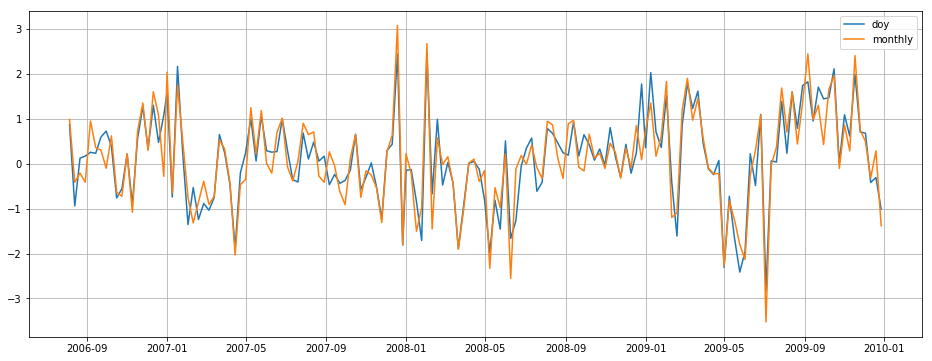

In [50]:
plt.figure(figsize=(16,6))
plt.plot(dfa.loc[dates[0]:dates[1]],label='doy')
plt.plot(df2.loc[dates[0]:dates[1]],label='monthly')
plt.legend();plt.grid()
plt.show()